# Read and Analyze Gaia Data
Out of the 852 targets included in the APF data, 842 of them can be resolved by Gaia. all-stars.txt contains the total list of stars corresponding to our APF observations, and gaia-stars.txt contains those stars included in the Gaia archive. I submitted this list of target names to the [Gaia Archive](https://gea.esac.esa.int/archive/) and downloaded the results from DR2 as a csv file gaia-dr2.csv. I separately downloaded all the distances of the targets, which are listed in distances.csv.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
# Read the data into a pandas dataframe
targets = pd.read_csv('gaia-dr2.csv')
# Pull out the useful columns
gaia_data = targets[["target_id", "source_id", "phot_g_mean_mag", "target_distance", "lum_val", "teff_val", 
                     "parallax", "radius_val", "ra", "dec"]]

distances = pd.read_csv('distances.csv')

Combine the rows corresponding to the same stars. For some of the targets, there are multiple entries listing different stellar parameters. This may be caused by other stars near or in the background of our target. 

In [14]:
aggregation_functions = {'phot_g_mean_mag': 'first', 'target_distance': 'first', "lum_val": 'first', 
                         "teff_val": 'first', "parallax": "first", "radius_val": 'first', "ra": 'first', 
                         "dec": 'first', 'source_id': 'first'}
gaia_data_by_star = gaia_data.groupby(gaia_data['target_id']).aggregate(aggregation_functions)

In [15]:
gaia_data_by_star

,phot_g_mean_mag,target_distance,lum_val,teff_val,parallax,radius_val,ra,dec,source_id
target_id,,,,,,,,,
GJ1002,11.780395,9.804545e-07,NaN,3314.0000,206.213433,NaN,1.676464,-7.546212,2441630500517079808
GJ144,3.369140,3.257824e-06,0.380818,4975.0000,312.219141,0.830664,53.228431,-9.458172,5164707970261630080
GJ234,9.580622,3.037641e-07,NaN,4293.0770,242.965890,NaN,97.350698,-2.817014,3117120863523946368
GJ54.1,10.429373,7.232721e-07,NaN,3296.5000,269.362825,NaN,18.133079,-16.996243,2358524597030794112
GJ628,8.794438,3.972463e-07,NaN,3727.3600,232.209532,NaN,247.574828,-12.667687,4330690742322011520
...,...,...,...,...,...,...,...,...,...
TYC2037-1484-1,10.911786,2.160599e-09,1.579063,6070.0000,4.481983,1.136253,239.702532,27.467453,1316569452328166912
hip36357,7.438890,1.020436e-08,0.290487,4943.0000,55.066797,0.734911,112.258173,31.994600,892215482207937152
hip44072,8.774686,1.227909e-07,0.133759,4443.5376,47.547908,0.617102,134.662093,20.546010,684865658135318144


Merge Gaia data with results from the laser detection algorithm, and then merge the distances as well.

In [18]:
# Read in results from laser detection algorithm.
results = pd.read_csv('/home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults.csv')

In [20]:
# Merge Gaia data with results.
results = pd.merge(results, gaia_data_by_star[['source_id', 'phot_g_mean_mag', 'target_distance', "lum_val", "teff_val", "parallax", "radius_val", "ra", "dec"]],
               left_on='Star', right_on='target_id', how='left')

In [21]:
# Remove all rows with null values.
results = results.dropna()

In [23]:
results

,Index,Unnamed: 0,Star,# Above Threshold,# Gaussian Shaped,# Wider than PSF,SNR,source_id,phot_g_mean_mag,target_distance,lum_val,teff_val,parallax,radius_val,ra,dec
0,0,0,HIP12444,62,57,57,150.149579,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211
1,1,1,HIP19855,12,10,7,162.887229,3.285218e+18,6.762743,7.911204e-09,0.723795,5648.0000,45.240430,0.888528,63.857006,6.199170
2,2,2,HIP12444,3,2,2,142.637226,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211
3,3,3,HIP12444,2,2,2,120.840487,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211
4,4,4,HIP42172,3,3,2,111.794018,5.949893e+17,5.798832,1.201904e-08,2.422240,6205.0500,38.051617,1.346699,128.961842,6.619641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,5859,859,HD28355,18,18,9,176.311487,3.307650e+18,4.951238,5.101363e-09,18.742050,7814.3335,20.588748,2.361986,67.209475,13.047538
5860,5860,860,HD28355,5,5,5,148.852551,3.307650e+18,4.951238,5.101363e-09,18.742050,7814.3335,20.588748,2.361986,67.209475,13.047538
5861,5861,861,HIP63942,93,83,68,76.406723,3.943233e+18,8.969439,4.084679e-05,0.114817,4122.9033,50.903479,0.664124,196.563896,20.729657
5862,5862,862,HD109085,12,8,8,105.609064,3.526420e+18,4.191621,5.690026e-06,4.954295,6722.0000,55.675250,1.641143,188.015707,-16.196256


In [24]:
# Merge above table with the distances table.
results = pd.merge(results, distances[['source_id', 'r_est', 'result_flag']],
               left_on='source_id', right_on='source_id', how='left')

In [25]:
# Remove all rows with null values.
results = results.dropna()

In [26]:
results

,Index,Unnamed: 0,Star,# Above Threshold,# Gaussian Shaped,# Wider than PSF,SNR,source_id,phot_g_mean_mag,target_distance,lum_val,teff_val,parallax,radius_val,ra,dec,r_est,result_flag
0,0,0,HIP12444,62,57,57,150.149579,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211,21.912367,1.0
2,2,2,HIP12444,3,2,2,142.637226,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211,21.912367,1.0
3,3,3,HIP12444,2,2,2,120.840487,5.173902e+18,5.648168,4.001750e-09,1.935647,6237.0000,45.609877,1.191555,40.051157,-9.453211,21.912367,1.0
4,4,4,HIP42172,3,3,2,111.794018,5.949893e+17,5.798832,1.201904e-08,2.422240,6205.0500,38.051617,1.346699,128.961842,6.619641,26.260679,1.0
5,5,5,HIP42172,0,0,0,137.168397,5.949893e+17,5.798832,1.201904e-08,2.422240,6205.0500,38.051617,1.346699,128.961842,6.619641,26.260679,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,5712,712,HIP61094,111,93,89,71.529733,3.902785e+18,8.950762,1.568625e-07,0.060047,3996.7024,73.763963,0.511087,187.813083,8.808353,13.552271,1.0
4177,5713,713,HIP61094,93,79,75,71.177313,3.902785e+18,8.950762,1.568625e-07,0.060047,3996.7024,73.763963,0.511087,187.813083,8.808353,13.552271,1.0
4181,5717,717,HIP76315,36,36,27,99.875078,1.603267e+18,8.023902,1.214140e-06,0.209434,4707.1000,51.151700,0.688129,233.835001,60.086291,19.538626,1.0
4182,5718,718,HIP76315,24,22,17,112.288203,1.603267e+18,8.023902,1.214140e-06,0.209434,4707.1000,51.151700,0.688129,233.835001,60.086291,19.538626,1.0


## Relationship between number of detections and other parameters
Plot the number of detections against other parameters like distance, SNR, magnitude, luminosity, and temperature.

In [28]:
num_detections = results['# Wider than PSF'].to_numpy()

parallax = results['parallax'].to_numpy() / 1000
geometric_distances = results['r_est']
given_distances = results['target_distance'].to_numpy()


SNR = results['SNR'].to_numpy()
mag = results['phot_g_mean_mag'].to_numpy()
lum = results['lum_val'].to_numpy()
temp = results['teff_val'].to_numpy()
radius = results['radius_val'].to_numpy()

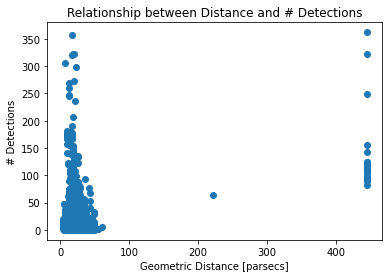

In [29]:
plt.scatter(geometric_distances, num_detections)
# plt.xlim(0, 80)
plt.xlabel('Geometric Distance [parsecs]')
plt.ylabel('# Detections')
plt.title('Relationship between Distance and # Detections')
plt.show()

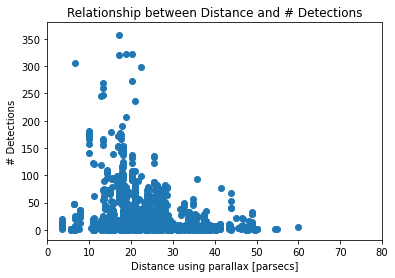

In [30]:
plt.scatter((1/parallax), num_detections)
plt.xlim(0, 80)
plt.xlabel('Distance using parallax [parsecs]')
plt.ylabel('# Detections')
plt.title('Relationship between Distance and # Detections')
plt.show()

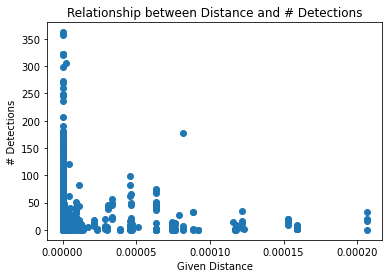

In [31]:
plt.scatter(given_distances, num_detections)
# plt.axvline(x=20, c='gray')
# plt.axhline(y=20, c='gray')
plt.xlabel('Given Distance')
plt.ylabel('# Detections')
plt.title('Relationship between Distance and # Detections')
plt.show()

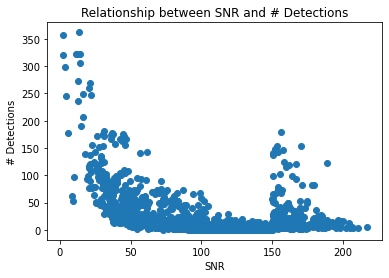

In [32]:
plt.scatter(SNR, num_detections)
plt.xlabel('SNR')
plt.ylabel('# Detections')
plt.title('Relationship between SNR and # Detections')
plt.show()

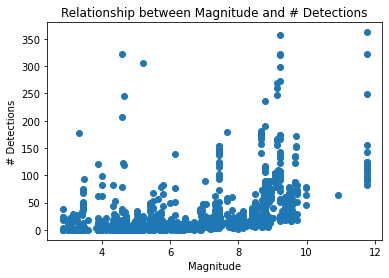

In [33]:
plt.scatter(mag, num_detections)
plt.xlabel('Magnitude')
plt.ylabel('# Detections')
plt.title('Relationship between Magnitude and # Detections')
plt.show()

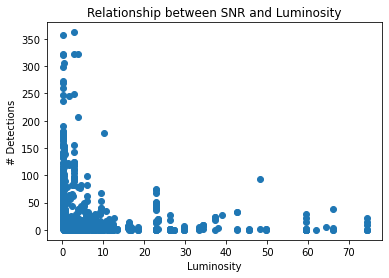

In [34]:
plt.scatter(lum, num_detections)
# plt.axvline(x=20, c='gray')
# plt.axhline(y=20, c='gray')
# plt.xlim(175, 200)
plt.xlabel('Luminosity')
plt.ylabel('# Detections')
plt.title('Relationship between SNR and Luminosity')
plt.show()

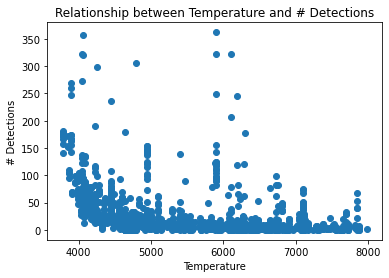

In [35]:
plt.scatter(temp, num_detections)
# plt.axvline(x=20, c='gray')
# plt.axhline(y=20, c='gray')
plt.xlabel('Temperature')
plt.ylabel('# Detections')
plt.title('Relationship between Temperature and # Detections')
plt.show()

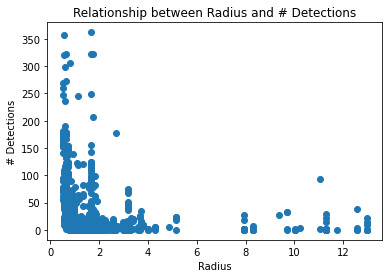

In [36]:
plt.scatter(radius, num_detections)
# plt.axvline(x=20, c='gray')
# plt.axhline(y=20, c='gray')
plt.xlabel('Radius')
plt.ylabel('# Detections')
plt.title('Relationship between Radius and # Detections')
plt.show()

Plot up the locations of all our targets.

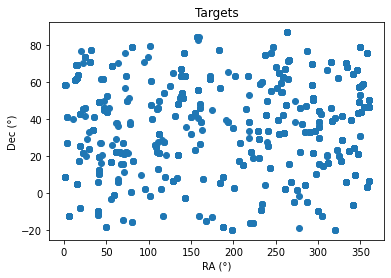

In [37]:
# Plot into ra/dec space.

plt.scatter(results['ra'], results['dec']) # Creating a scatter-plot
plt.xlabel('RA (°)')
plt.ylabel('Dec (°)')
plt.title('Targets')
plt.show()